In [1]:
!pwd

/home/outcast/study/ml_hse/notebooks


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

/home/outcast/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
table_path = '../data/marketing_campaign.csv'

In [4]:
df = pd.read_csv(table_path, sep = ';')

Easy - количество отзывов

In [5]:
complain_sum = df['Complain'].sum()

Easy - средний возраст

In [6]:
firtst_mean = (2024 - df['Year_Birth']).mean()
second_mean = (2024 - df[(df['MntWines'] > 0) | (df['MntFruits'] > 0) | (df['MntMeatProducts'] > 0) | \
                    (df['MntFishProducts'] > 0) | (df['MntSweetProducts'] > 0) | (df['MntGoldProds'] > 0)]['Year_Birth']).mean()

Получили, что средние показатели равны относительно всей выборки

In [7]:
print (firtst_mean, second_mean, complain_sum)

55.19419642857143 55.19419642857143 21


Medium

In [8]:
df['Age'] = 2024 - df['Year_Birth']

Рассмотри зависимость покупок от семейного положения 

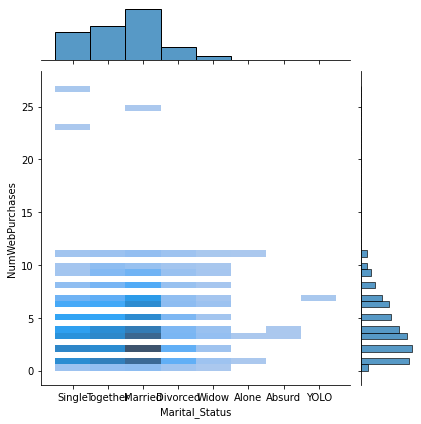

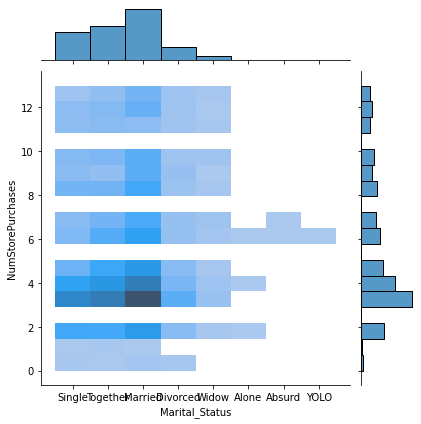

In [9]:
sns.jointplot(x=df['Marital_Status'], y=df['NumWebPurchases'], kind="hist")
sns.jointplot(x=df['Marital_Status'], y=df['NumStorePurchases'], kind="hist")

Можем видеть, что замужние люди покупают товаров больше, а еще что по каждой категории число покупок распределено нормально

Посмотрим теперь, как зависит число покупок от годового дохода

<Axes: xlabel='Income', ylabel='NumStorePurchases'>

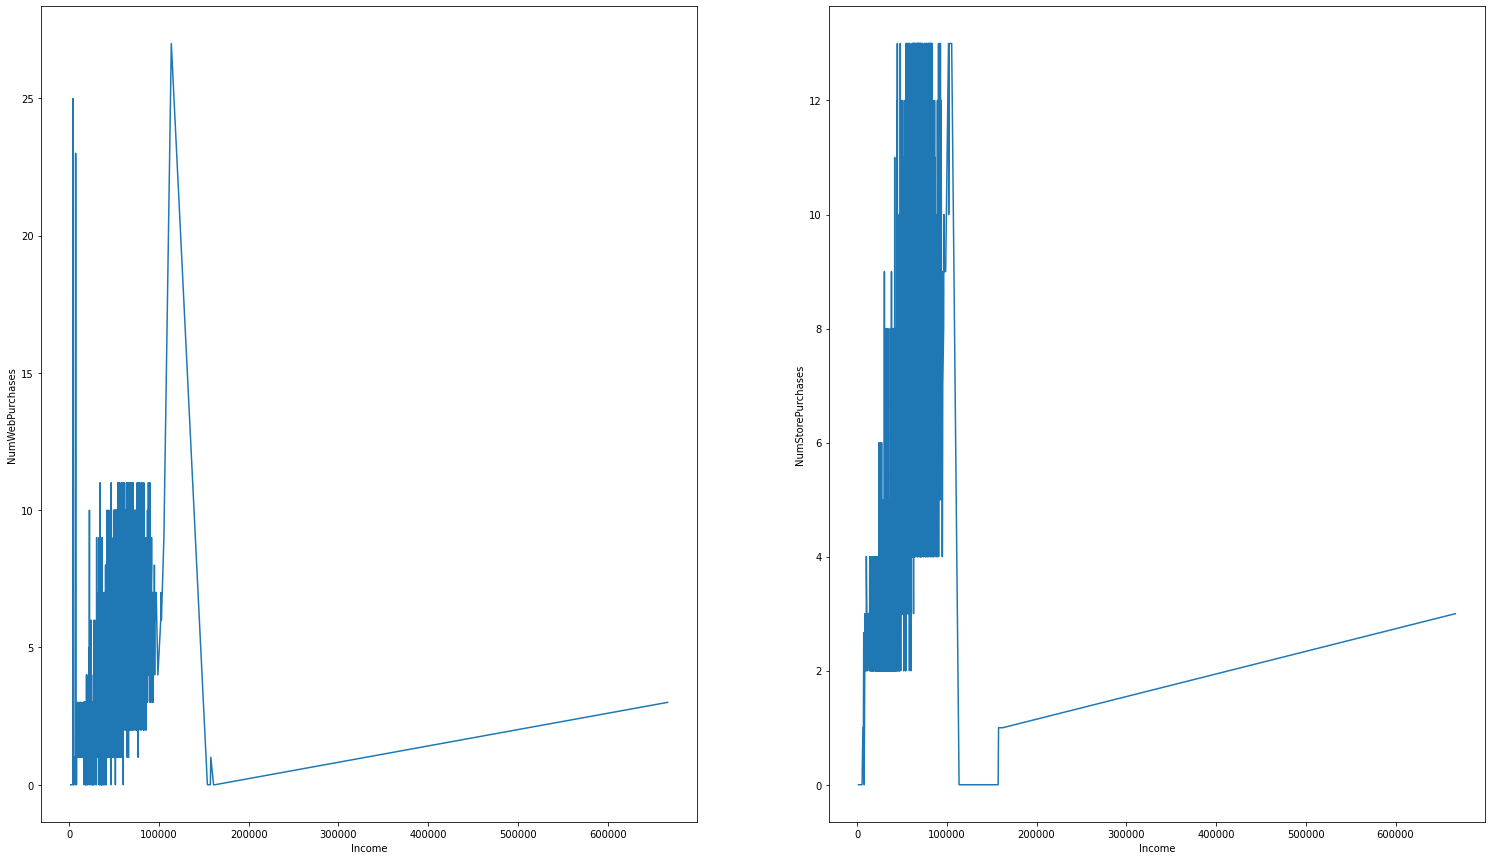

In [10]:
plt.figure(figsize=(40, 15))
plt.subplot(1, 3, 1)
sns.lineplot(x=df['Income'], y=df['NumWebPurchases'])
plt.subplot(1, 3, 2)
sns.lineplot(x=df['Income'], y=df['NumStorePurchases'])

Можно увидеть, что с увеличением семейного бюджета уровень покупок растет, как онлайн, так ив магазинах, однако. клиентов с сильно большим доходом у магазина не много

Посмотрим на зависимости от возраста: число покупок, число детей в семье, годовой доход, жаловался ли клиент

[Text(0.5, 1.0, 'Зависимость числа подростков от возраста')]

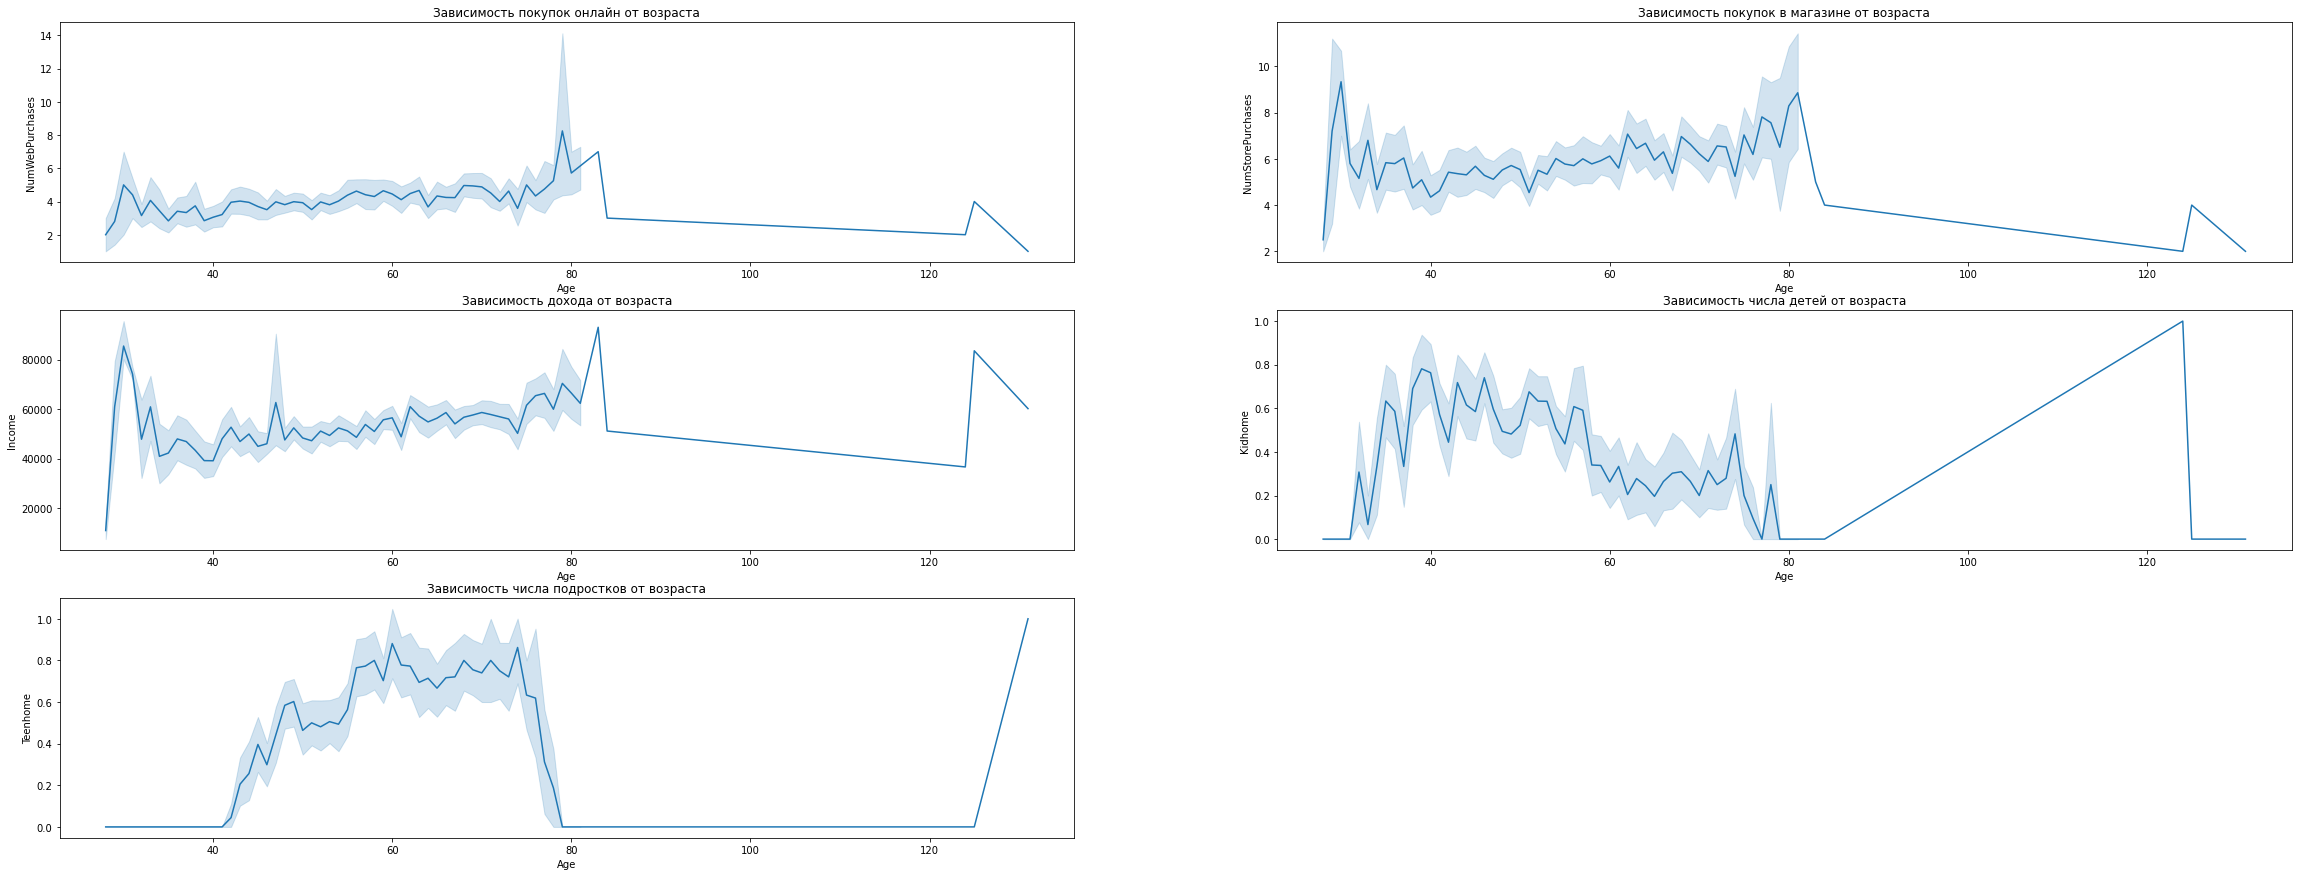

In [11]:
plt.figure(figsize=(40, 15))
plt.subplot(3, 2, 1)
sns.lineplot(x=df['Age'], y=df['NumWebPurchases']).set(title='Зависимость покупок онлайн от возраста')
plt.subplot(3, 2, 2)
sns.lineplot(x=df['Age'], y=df['NumStorePurchases']).set(title='Зависимость покупок в магазине от возраста')
plt.subplot(3, 2, 3)
sns.lineplot(x=df['Age'], y=df['Income']).set(title='Зависимость дохода от возраста')
plt.subplot(3, 2, 4)
sns.lineplot(x=df['Age'], y=df['Kidhome']).set(title='Зависимость числа детей от возраста')
plt.subplot(3, 2, 5)
sns.lineplot(x=df['Age'], y=df['Teenhome']).set(title='Зависимость числа подростков от возраста')

Можем увидеть, что с возрастом люди чаще покупают в магазине, так же видно, что доход увеличивается с возрастом клиента, и что максимальное количество детей приходится на клиентов, которым 30-40 лет, а подростков на 60-70 лет

Посмотрим на зависимости от образования: как влияет на число покупок, на доход, на количество детей в семье

[Text(0.5, 1.0, 'Зависимость числа подростков от образования')]

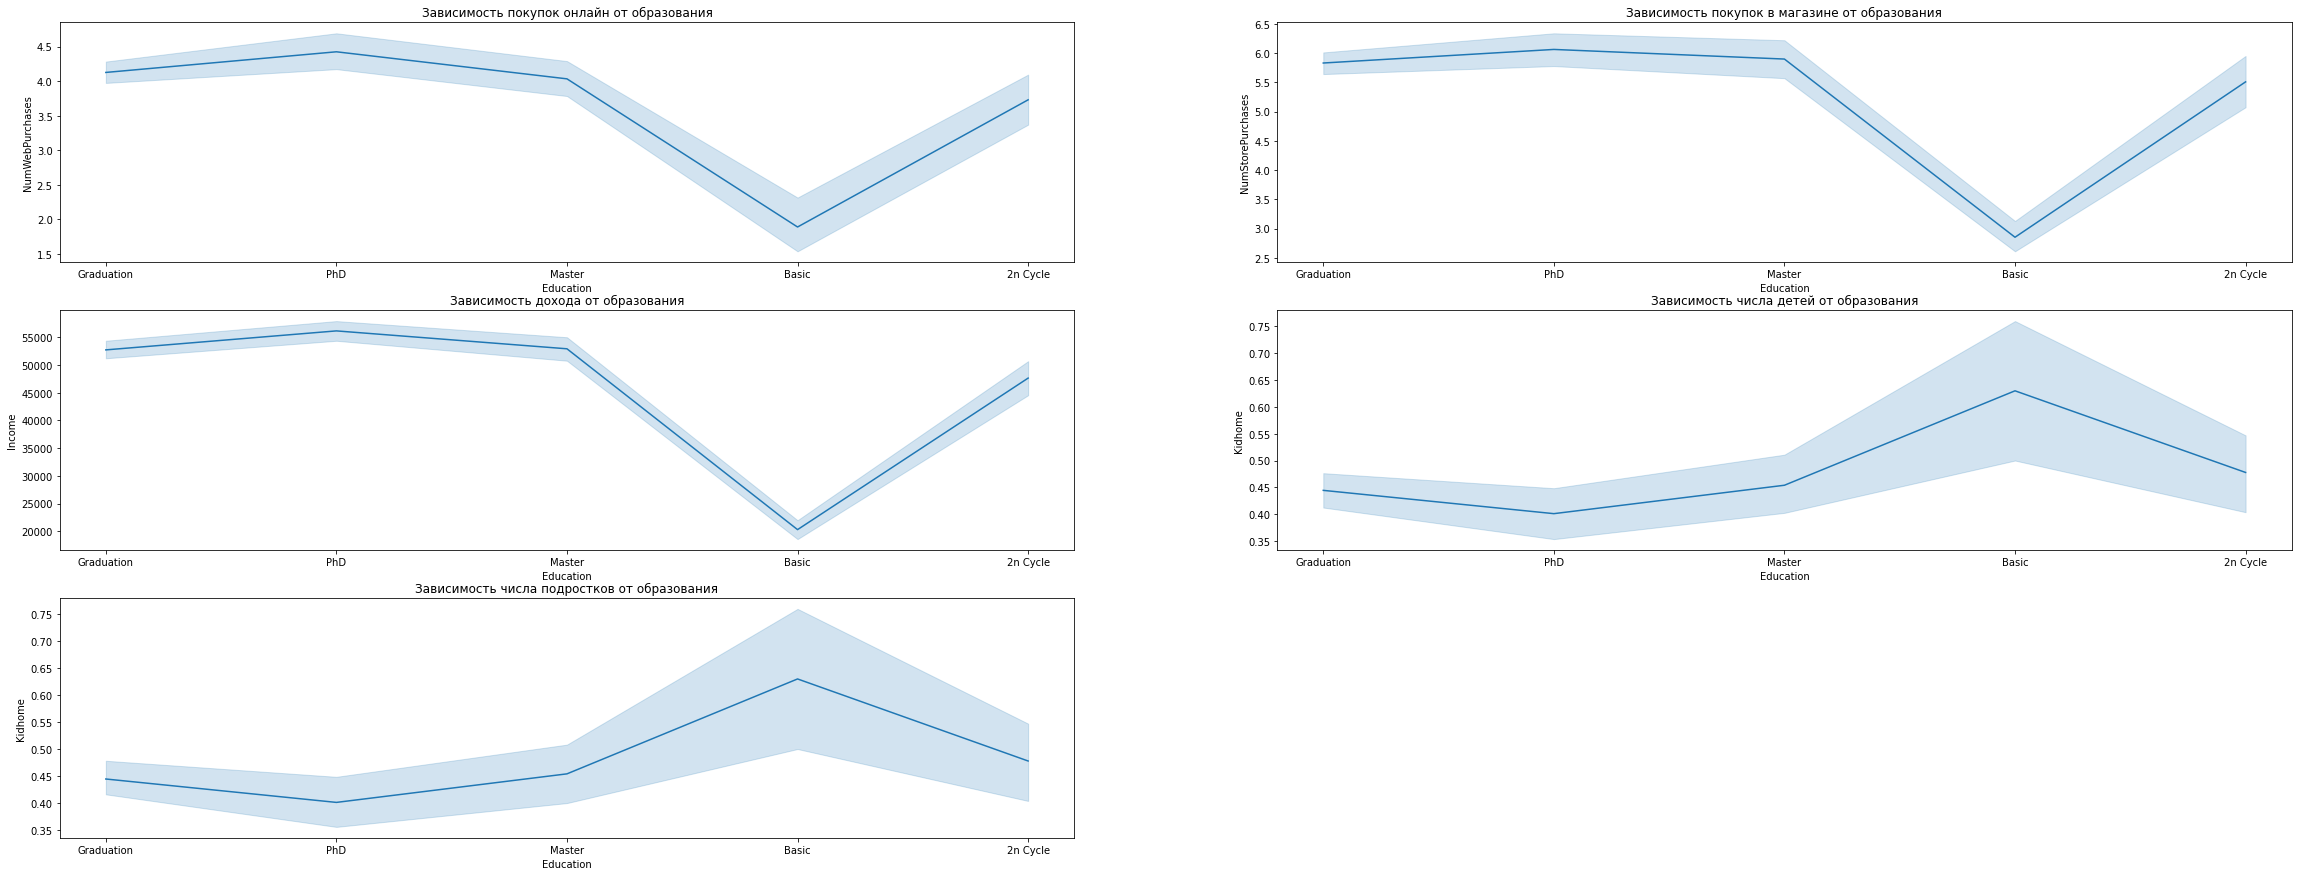

In [12]:
plt.figure(figsize=(40, 15))
plt.subplot(3, 2, 1)
sns.lineplot(x=df['Education'], y=df['NumWebPurchases']).set(title='Зависимость покупок онлайн от образования')
plt.subplot(3, 2, 2)
sns.lineplot(x=df['Education'], y=df['NumStorePurchases']).set(title='Зависимость покупок в магазине от образования')
plt.subplot(3, 2, 3)
sns.lineplot(x=df['Education'], y=df['Income']).set(title='Зависимость дохода от образования')
plt.subplot(3, 2, 4)
sns.lineplot(x=df['Education'], y=df['Kidhome']).set(title='Зависимость числа детей от образования')
plt.subplot(3, 2, 5)
sns.lineplot(x=df['Education'], y=df['Kidhome']).set(title='Зависимость числа подростков от образования')

Мы можем видеть, что меньше всего покупок у людей с базовым образованием, как и меньше их доход, но детей в среднем у таких людей больше